<a href="https://colab.research.google.com/github/NajmehNyr/2AFC-Color-Discrimination-Task/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns; sns.set()

from google.colab import files

###Uploading dataset

In [ ]:
#No Adaptation
upload1 = files.upload()
da = pd.read_excel('noadapt2afc2.xlsx')

Saving noadapt2afc2.xlsx to noadapt2afc2.xlsx


In [ ]:
#Adaptation
upload2 = files.upload()
df = pd.read_excel('adapt2afc2.xlsx')

Saving adapt2afc2.xlsx to adapt2afc2.xlsx


##Analysis

###Equations

In [ ]:
#No Adaptation

grouped2 = da.groupby('.thisIndex')
# Calculate proportion of 'blue' responses using vectorized operation
data2 = grouped2['response'].apply(lambda x: (x == 1).mean()).reset_index()
data2.columns = ['index', 'proportion_blue']
data2['index'] = data2['index'] / 19 * 100
x_data2 = data2['index'].astype(float) #
y_data2 = data2['proportion_blue'].astype(float) #


#  تعریف تابع لوجستیک (سیگموئید)
def logistic(xa, La ,x0a, ka):
    return La / (1 + np.exp(-ka * (xa - x0a)))

##
initial_guess2 = [1, np.median(x_data2), 0.5]
params2, _ = curve_fit(logistic, x_data2, y_data2, p0=initial_guess2, maxfev=5000)

La, x0a, ka = params2
x_fit2 = np.linspace(min(x_data2), max(x_data2), 200)
y_fit2 = logistic(x_fit2, *params2)

In [ ]:
#Adaptation

grouped = df.groupby('.thisIndex')
proportion_blue = grouped['response'].mean()
data = proportion_blue.reset_index()
data.columns = ['index', 'proportion_blue']
data['index'] = data['index'] / 19 * 100
x_data = data['index'].astype(float)
y_data = data['proportion_blue'].astype(float)


# تعریف تابع لوجستیک (Psychometric function)
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))


initial_guess = [1, np.median(x_data), 0.5]
params, _ = curve_fit(logistic, x_data, y_data, p0=initial_guess)


L, x0, k = params
x_fit = np.linspace(min(x_data), max(x_data), 200)
y_fit = logistic(x_fit, *params)

###Plots

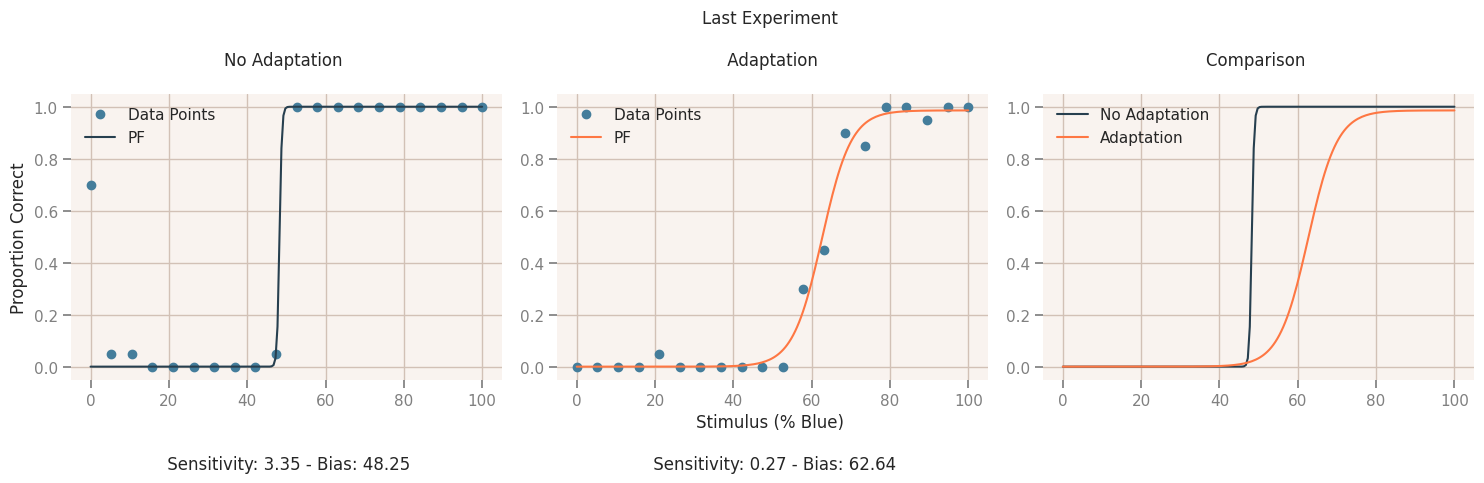

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a figure and three axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# customizing the figure
for ax in axes:
  # background
  ax.set_facecolor('#f9f3ef')
  ax.set_axisbelow(True)
  # draw solid white grid lines
  ax.grid(color='#D2C1B6', linestyle='solid')
  # hide axis spines
  for spine in ax.spines.values():
    spine.set_visible(False)
  # hide top and right ticks
  ax.xaxis.tick_bottom()
  ax.yaxis.tick_left()
  # lighten ticks and labels
  ax.tick_params(colors='gray', direction='out')
  for tick in ax.get_xticklabels():
    tick.set_color('gray')
  for tick in ax.get_yticklabels():
    tick.set_color('gray')

#No Adaptation
axes[0].plot(x_data2, y_data2, 'o', label='Data Points', color='#447D9B') #scatter
axes[0].plot(x_fit2, y_fit2, '-', label='PF', color='#273F4F') #curve
axes[0].set(title='No Adaptation \n',
            ylabel='Proportion Correct',
            xlabel=f'\n \n Sensitivity: {ka:.2f} - Bias: {x0a:.2f}') #instead of annote
axes[0].legend(frameon=False)

#Adaptation
axes[1].plot(x_data, y_data, 'o', label='Data Points', color='#447D9B') #scatter
axes[1].plot(x_fit, y_fit, '-', label='PF', color='#FE7743') #curve
axes[1].set(title='Last Experiment \n \n Adaptation \n', #title of fig + axes[1]
            xlabel=f'Stimulus (% Blue) \n \n Sensitivity: {k:.2f} - Bias: {x0:.2f}', #instead of annote
            yticks=np.linspace(0.0,1.0,6)) # in some cases it never reach 1.0 like other data
axes[1].legend(frameon=False)

#Comparison
axes[2].plot(x_fit2, y_fit2, '-', color='#273F4F', label='No Adaptation')
axes[2].plot(x_fit, y_fit, '-', color='#FE7743', label='Adaptation')
axes[2].set(title='Comparison \n')
axes[2].legend(frameon=False)

plt.tight_layout()
plt.show()

fig.savefig('NoAdaptation2.png')
files.download('NoAdaptation2.png')